<div align="center">

# **Réalisé par:** 
`ABARAGH Saida` &
`AIT BELLA Nouhaila` &
`EL FATHI Zakaria` &
`ELMAZOUTI Ilias`
## **Encadré par:** 
`Pr. KHALFI Hamza`

---
"`2022/2023` //
`ENSA Khouribga` //
`Informatique et Ingénierie des Données 2`"

</div>


>L'objectif de ce TP est d'implémenter et de tester les algorithmes du gradient à pas constant et à pas optimal (exact ou approché). On utilisera pour cela le langage de programmation PYTHON.<br/>
Pour chacune des fonctions demandées ci-dessous, on réalisera des tests en utilisant la fonction de Rosenbrock (que l'on cherche à minimiser):<div style="width: 400px"> ![Alt text](assets/fnct.jpg)</div>


# Import des librairies nécéssaires

In [17]:
import numpy as np
import matplotlib.pyplot as plt

on désactive les warnings du au surcharge de mémoire

In [18]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Task 1
### a) fonction d'évaluation de la fonction de Rosenbrock en un point X donné

In [19]:
def rosenbrock(x, param):
    x0, x1 = x
    term1 = (x0 - 1)**2
    term2 = param*(x1 - x0**2)**2
    return term1 + term2

test de la fonction

In [20]:
rosenbrock([0.56227983, 0.78658451], 100)

22.3216519474083

### b) fonction d'évaluation du gradient de la fonction de Rosenbrock en un point X donné

In [21]:
def gradient_f(X, param):
    # Calcul de la dérivée partielle par rapport à x0
    grad_0 = 2*(X[0]-1) + 4*param*(X[0]**2-X[1])*X[0]

    # Calcul de la dérivée partielle par rapport à x1
    grad_1 = -2*param*(X[0]**2-X[1])
    
    # Assemblage des deux dérivées partielles dans un vecteur gradient
    gradient = np.array([grad_0, grad_1])
    
    # Renvoi du vecteur gradient
    return gradient

test de la fonction

In [22]:
gradient_f([0.99219096, 0.98412779], 100)

array([ 0.10944208, -0.06302222])

### c) fonction qui trace les courbes d'isovaleurs de la fonction de Rosenbrock sur un pavé [a, b] x [c, d]

In [23]:
def plot_rosenbrock(a, b, c, d, param):
    # Définition de la fonction de Rosenbrock pour calculer les isovaleurs
    rosenbrock_isovaleurs = lambda x, y, param: (x-1)**2 + param*(x**2-y)**2
    
    # Création d'une grille 2D d'intervalles
    X, Y = np.meshgrid(np.linspace(a, b, 100), np.linspace(c, d, 100))
    
    # Calcul des valeurs de la fonction de Rosenbrock pour chaque point de la grille
    Z = rosenbrock_isovaleurs(X, Y, param)
    
    # Tracé des isovaleurs de la fonction de Rosenbrock
    contours = plt.contour(X, Y, Z, np.logspace(-3, 3, 20, base=10))
    
    # Affichage de la figure
    plt.show()


test de la fonction

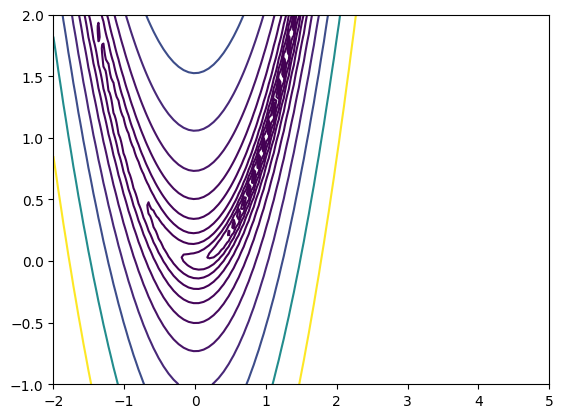

In [24]:
a =-2; b = 5
c =-1.0; d = 2
plot_rosenbrock(a,b,c,d,100)

# TASK 2: Une fonction GPF réalisant l'algorithme du gradient à pas fixe

- Les paramètres d'entrée de cette fonction :<br/>
  - nom de la fonction donnant le gradient en un point X de la fonction à minimiser, 
  - valeur du pas constant p le long du gradient,
  - valeur initiale Xo,
  - nombre maximum d'itérations,
  - la liste param des paramètres de la fonction à minimiser.<br/>
- Pour les paramètres de sortie :
  - la liste des points successifs calculés par l'algorithme.

In [25]:
def GPF(grad, ro, x0, max_iter, param, tol=1e-6):
    # Conversion de x0 en un tableau NumPy
    x = np.asarray(x0)
    
    # Création d'un tableau pour stocker les itérations de x
    x_list = np.zeros((np.max(np.shape(x0)), max_iter))
    
    # Calcul du gradient initial
    grad_x = grad(x, param)
    
    # Boucle principale pour la descente de gradient
    for i in range(max_iter):
        x = x - ro*grad_x    # Mise à jour de x
        x_list[:, i] = x     # Stockage de la nouvelle valeur de x dans x_list
        
        # Condition d'arrêt si la norme du gradient est inférieure ou égale à la tolérance
        if np.linalg.norm(grad_x) <= tol:
            break
        
        # Calcul du nouveau gradient
        grad_x = grad(x, param)
       
    return x_list


la fonction renvoie le tableau x_list contenant les itérations successives de x.

In [26]:
# test de la fonction GPF
grad = gradient_f
ro = 0.01
x0 = (-1, 1)
param = [10, 100]
x_list = GPF(grad, ro, x0, 1000, 10)
print(x_list[:,-1])

[0.99219096 0.98412779]


# TASK 3: algorithme du gradient avec une recherche linéaire inexacte de type Armijo (backtracking)

a) definissons la fonction RLA pour la recherche linéaire inexacte de type Armijo.
- Paramètres d'entrée :
    - nom de la fonction donnant la valeur en un point X de la fonction à minimiser,
    - nom de la fonction donnant le gradient en un point X de la fonction appelée en premier argument,
    - valeur du point courant X,
    - la direction de descente d considérée,
    - valeur po pour initier la recherche linéaire,
    - la liste param des paramètres de la fonction à minimiser,
    - la liste param RL des paramètres de la recherche linéaire. 
- Paramètres de sortie : la valeur Ρ du pas tel que: <div style="width: 400px"> ![Alt text](assets/fnct2.jpg)</div>

In [27]:
def RLA(f, grad, x0, d, ro, c, alpha, param):
    
    # initialisation de x
    x = x0 + alpha*d
    
    # tant que la condition est vraie
    while (f(x, param) > f(x0, param) + c*alpha*np.dot(grad(x0, param), d)):
        
        # mise à jour de x
        x = x0 + alpha*d
        
        # mise à jour de alpha
        alpha = ro*alpha
        
        # mise à jour de x0 et de d
        x0 = x
        d = grad(x, param)
    
    return alpha


Tant que la fonction objectif en x est plus grande que la fonction objectif en x0 plus le produit de c, alpha et le produit scalaire du gradient en x0 et la direction de descente d. <br/>Dans chaque itération, la fonction met à jour x en utilisant alpha, met à jour alpha en le multipliant par ro, met à jour x0 en lui assignant la valeur courante de x, et met à jour la direction de descente d en calculant le gradient en x. Lorsque la condition d'Armijo n'est plus vérifiée, la fonction retourne le dernier pas alpha calculé.

test de la fonction:

In [28]:
RLA(rosenbrock, gradient_f, (-5, 9), gradient_f((-5, 9), 10), 0.1, 0.1, 1, 10)

0.1

b) La fonction GRL réalisant l'algorithme du gradient avec une recherche linéaire

- Paramètres d'entrée :
    - nom de la fonction donnant la valeur en un point X de la fonction à minimiser,
    - nom de la fonction donnant le gradient en un point X de la fonction appelée en premier argument,
    - nom de la recherche linéaire choisie,
    - valeur po pour initier la recherche linéaire,
    - valeur initiale Xo,
    - nombre maximum d'itérations,
    - la liste param des paramètres de la fonction à minimiser,
    - la liste param RL des paramètres de la recherche linéaire.
- Paramètres de sortie :
    - la liste des points successifs calculés par l'algorithme,
    - (éventuellement) la liste des valeurs optimales successives du paramètre p obtenues à chaque itération de l'algorithme.

In [29]:
def GRL(objective_function, gradient_function, line_search_function, ro0, initial_point, max_iterations, parameters):
    # Initialize lists to store x and alpha values
    x_list = np.zeros((np.max(np.shape(initial_point)), max_iterations)) 
    alpha_list = np.zeros((np.max(np.shape(initial_point)), max_iterations)) 
    
    # Initialize the starting point and its associated parameters
    x = np.asarray(initial_point)
    gradient_x = gradient_function(x, parameters)
    direction = -gradient_x
    f_x = objective_function(x, parameters)
    
    # Calculate the initial value of alpha
    alpha_init = np.dot(direction, direction) / np.linalg.norm(direction)**2
    alpha = line_search_function(objective_function, gradient_function, x, gradient_x, ro0, 0.1, alpha_init, parameters) 
    
    # Main loop of the algorithm
    for i in range(max_iterations):
        x = x + alpha * direction
        gradient_x = gradient_function(x, parameters)
        x_list[:,i] = x
        alpha_list[:, i] = alpha
        
        # Termination condition: gradient is small enough
        if np.linalg.norm(gradient_x) <= 10**-6:
            break
        
        # Update the value of alpha
        alpha = line_search_function(objective_function, gradient_function, x, gradient_x, ro0, 0.1, alpha, parameters)
    
    # Return the lists of x and alpha values
    return x_list, alpha_list


In [30]:
# Tester la fonction GRL avec des paramètres spécifiques
# - la fonction rosenbrock comme fonction objectif
# - la fonction gradient_f comme fonction gradient
# - la fonction RLA comme fonction de recherche de ligne
# - ro0=0.1 comme valeur initiale pour le paramètre de recherche de ligne
# - x0=(-1, 1) comme point de départ
# - max_iter=1000 comme nombre maximum d'itérations
# - param=10 comme paramètre de la fonction de Rosenbrock

# Stocker les résultats dans les variables x_list et alpha_list
x_list, alpha_list = GRL(rosenbrock, gradient_f, RLA, 0.1, (-1, 1), 1000, 10)

# Afficher les valeurs d'alpha pour la dernière itération
print(alpha_list[:, -1])


[1.e-18 1.e-18]
